In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import glob

### Data Pipeline

In [4]:
test_yes_filepaths = glob.glob('Bone_Fracture_Binary_Classification\\test\\fractured\\*.jpg') + glob.glob('Bone_Fracture_Binary_Classification\\test\\fractured\\*.png')
test_no_filepaths = glob.glob('Bone_Fracture_Binary_Classification\\test\\not fractured\\*.jpg') + glob.glob('Bone_Fracture_Binary_Classification\\test\\not fractured\\*.png')
train_yes_filepaths = glob.glob('Bone_Fracture_Binary_Classification\\train\\fractured\\*.jpg') + glob.glob('Bone_Fracture_Binary_Classification\\train\\fractured\\*.jpeg') +glob.glob('Bone_Fracture_Binary_Classification\\train\\fractured\\*.png')
train_no_filepaths = glob.glob('Bone_Fracture_Binary_Classification\\train\\not fractured\\*.jpg') + glob.glob('Bone_Fracture_Binary_Classification\\train\\not fractured\\*.png')
val_yes_filepaths = glob.glob('Bone_Fracture_Binary_Classification\\val\\fractured\\*.png') + glob.glob('Bone_Fracture_Binary_Classification\\val\\fractured\\*.jpg') +glob.glob('Bone_Fracture_Binary_Classification\\val\\fractured\\*.jpeg')
val_no_filepaths = glob.glob('Bone_Fracture_Binary_Classification\\val\\not fractured\\*.png') + glob.glob('Bone_Fracture_Binary_Classification\\val\\not fractured\\*.jpg')

In [5]:
def preprocess_test_images(filepath):
    img = tf.io.read_file(filepath)
    img = tf.image.decode_image(img , channels = 3)
    img = tf.cast(img, tf.float32) / 255.0
    img.set_shape([None , None , 3])
    img = tf.image.resize_with_pad(img, 218, 180)
    return img

In [6]:
testyesimgtensor = tf.TensorArray(tf.float32, size = 0 , dynamic_size = True)
trainyesimgtensor = tf.TensorArray(tf.float32, size = 0 , dynamic_size= True )
valyesimgtensor = tf.TensorArray(tf.float32 , size = 0 , dynamic_size = True)

In [7]:
testyesdataset = tf.data.Dataset.from_tensor_slices(test_yes_filepaths)
testyesdataset = testyesdataset.map(preprocess_test_images)

In [8]:
trainyesdataset = tf.data.Dataset.from_tensor_slices(train_yes_filepaths)
trainyesdataset = trainyesdataset.map(preprocess_test_images)

In [9]:
valyesdataset = tf.data.Dataset.from_tensor_slices(val_yes_filepaths)
valyesdataset = valyesdataset.map(preprocess_test_images)

In [10]:
for img in testyesdataset:
    testyesimgtensor = testyesimgtensor.write(testyesimgtensor.size() , img)
    
testyesimgtensor = testyesimgtensor.stack()

In [11]:
for im in trainyesdataset:
    trainyesimgtensor = trainyesimgtensor.write(trainyesimgtensor.size() , im)

InvalidArgumentError: {{function_node __wrapped__IteratorGetNext_output_types_1_device_/job:localhost/replica:0/task:0/device:CPU:0}} Input shape axis 0 must equal 4, got shape [5]
	 [[{{node resize_image_with_pad/unstack}}]] [Op:IteratorGetNext] name: 

In [12]:
for img in valyesdataset:
    valyesimgtensor = valyesimgtensor.write(valyesimgtensor.size() , img)

In [ ]:
trainyesimgtensor = trainyesimgtensor.stack()

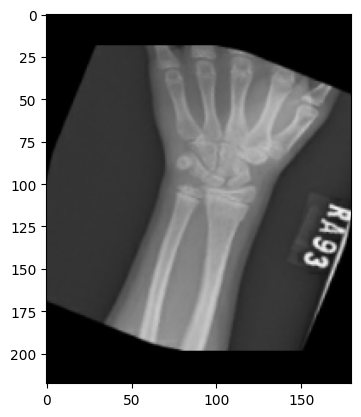

In [ ]:
plt.figure()
plt.imshow(testyesimgtensor[2])